In [121]:
# importing libraries
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [122]:
# loading the data
messages = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=[0,1])
# giving names to column
messages.columns = ['label','text']
# assigning label numbers
# 0- ham(not spam)
# 1- spam
messages['label_num'] = messages['label'].map({'ham': 0, 'spam': 1})
# printing first 5 results
messages.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [123]:
# downloading stopwords
nltk.download('stopwords')
# taking stopwords from nltk
stopwords=nltk.corpus.stopwords.words('english')
# cleaning data
def clean_text(text):
  text="".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split(r'\W+', text)
  text=[word for word in tokens if word not in stopwords]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
# TF-IDF Vectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5572, 9395)
['' '0' '008704050406' ... 'ûïharry' 'ûò' 'ûówell']


In [125]:
# Converting sparse TF-IDF matrix to a regular array and storing as a DataFrame
X_features=pd.DataFrame(X_tfidf.toarray())
# printing first 5 rows
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# random train test split (80% training,20% testing)
X_train,X_test,y_train,y_test=train_test_split(X_features,messages['label_num'],test_size=0.2)

In [127]:
# training model
naivebayes=MultinomialNB()
naivebayes_model=naivebayes.fit(X_train,y_train)

In [128]:
# prediction on test data
y_pred=naivebayes_model.predict(X_test)

In [129]:
# accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9632286995515695


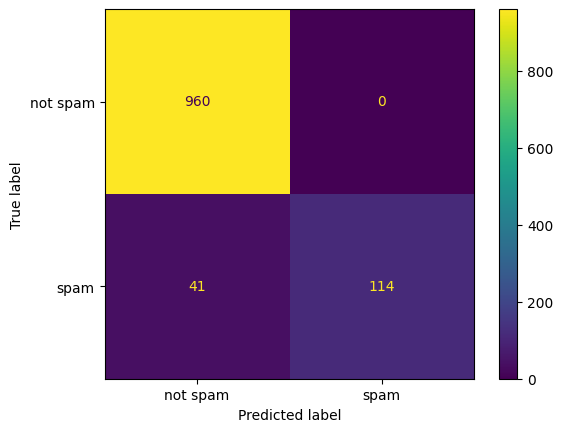

In [130]:
# confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["not spam", "spam"])
disp.plot()
plt.show()
